# CASE STUDY: IRIS PLANT CLASSIFICATION USING K-NEAREST NEIGHBORS





# STEP #0: PROBLEM STATEMENT

The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. The attribute to be predicted is the class of iris plant. The classes are as follows: 1. Iris Setosa, 2. Iris Versicolour, 3. Iris Virginica

There are 4 features:
1. sepalLength: sepal length in cm
2. sepalWidth: sepal width in cm
3. petalLength: petal length in cm
4. petalWidth: petal width in cm

There are 3 classes represneting class label of iris flower {1,2,3}
1. Iris Setosa
2. Iris Versicolour
3. Iris Virginica




# STEP #1: IMPORTING DATA

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('Iris.csv')

# STEP #2: EXPLORING THE DATASET  

In [ ]:
df.head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# Let's view the head of the training dataset

In [ ]:
df.tail(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [ ]:
# Let's view the last elements in the training dataset

<Axes: xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

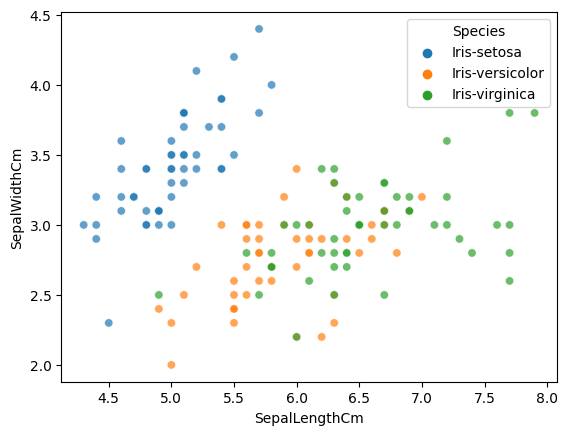

In [ ]:
sns.scatterplot(x="SepalLengthCm", y="SepalWidthCm", hue="Species", data = df, alpha = 0.7)

<Axes: xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

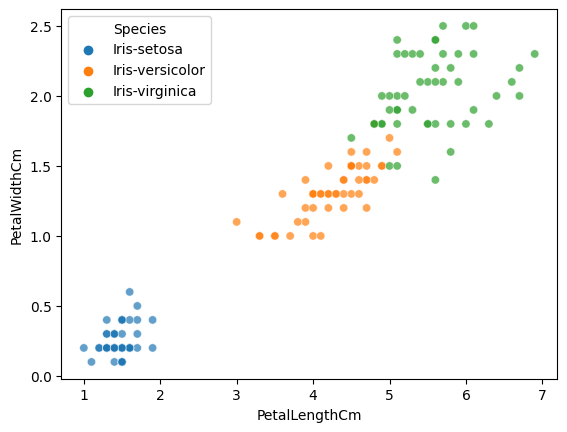

In [ ]:
sns.scatterplot(x="PetalLengthCm", y="PetalWidthCm", hue="Species", data = df, alpha = 0.7)

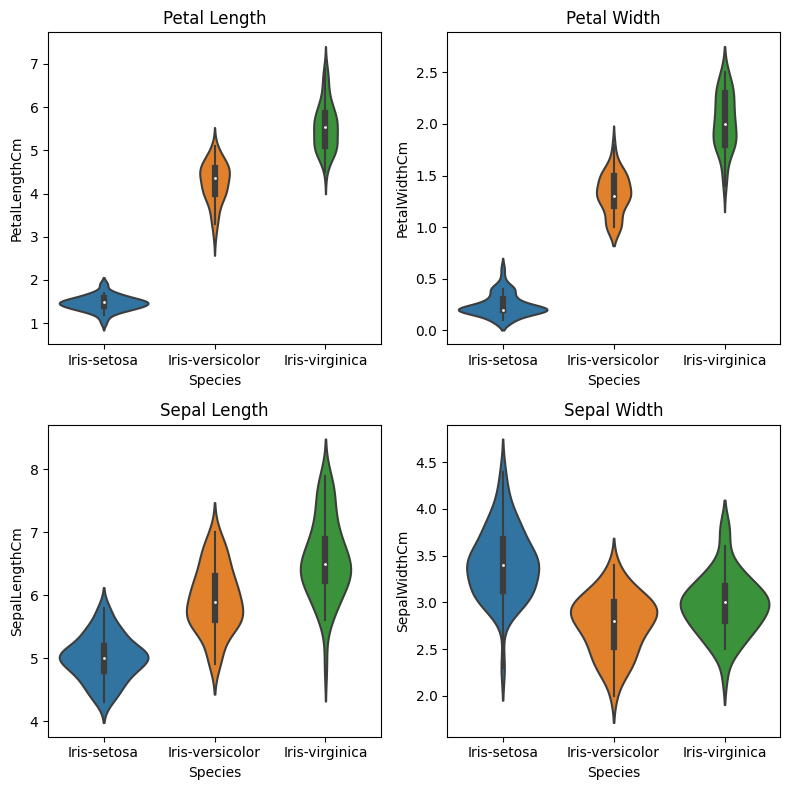

In [ ]:
# Create subplots for each feature
plt.figure(figsize=(8, 8))  # Adjust the figure size if needed

# Plot PetalLengthCm and PetalWidthCm in the top row
plt.subplot(2, 2, 1)
sns.violinplot(x='Species', y='PetalLengthCm', data=df, alpha=0.7)
plt.title('Petal Length')

plt.subplot(2, 2, 2)
sns.violinplot(x='Species', y='PetalWidthCm', data=df, alpha=0.7)
plt.title('Petal Width')

# Plot SepalLengthCm and SepalWidthCm in the bottom row
plt.subplot(2, 2, 3)
sns.violinplot(x='Species', y='SepalLengthCm', data=df, alpha=0.7)
plt.title('Sepal Length')

plt.subplot(2, 2, 4)
sns.violinplot(x='Species', y='SepalWidthCm', data=df, alpha=0.7)
plt.title('Sepal Width')

# Adjust subplot layout
plt.tight_layout()

# Show the plot
plt.show()

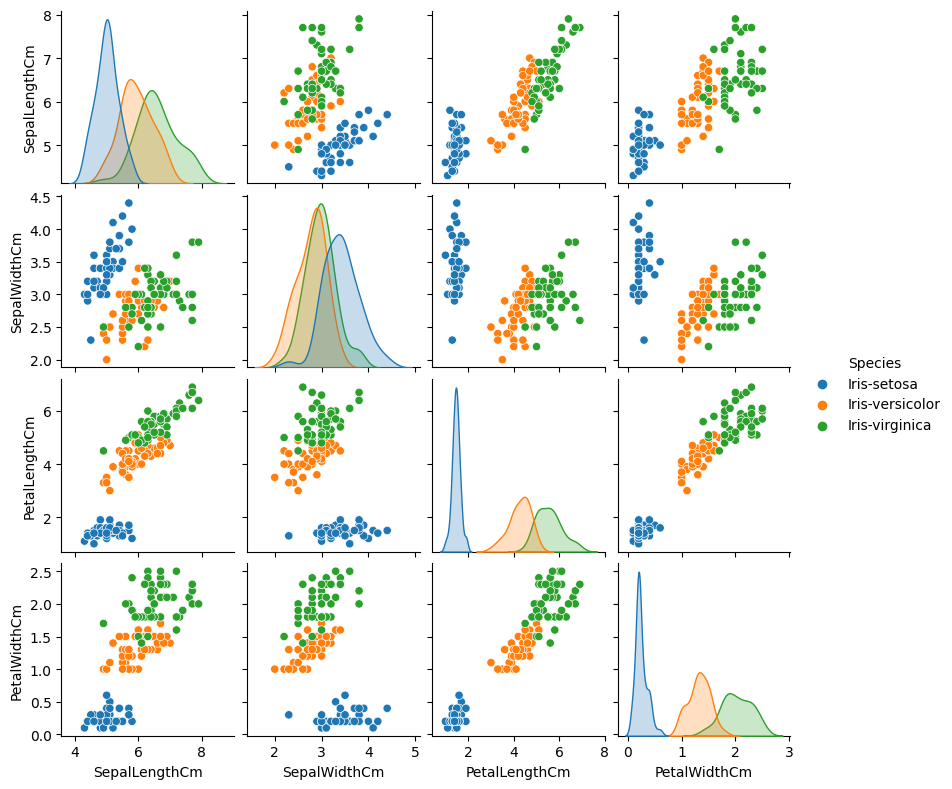

In [ ]:
sns.pairplot(df, hue = "Species", height=2)

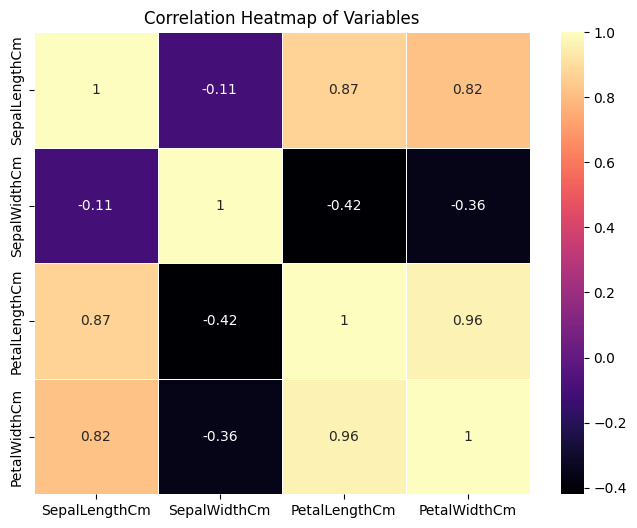

In [ ]:
# Let's check the correlation between the variables
# Extract the four variables
variables = ['SepalLengthCm', 'SepalWidthCm','PetalLengthCm','PetalWidthCm']
correlation_matrix = df[variables].corr()

# Create a heatmap with a valid colormap (e.g., "magma")
plt.figure(figsize=(8, 6))  # Adjust the figure size if needed
sns.heatmap(correlation_matrix, annot=True, cmap="magma", linewidths=0.5)
plt.title('Correlation Heatmap of Variables')

# Show the heatmap
plt.show()

# STEP #3: DATA CLEANING

In [ ]:
# Let's drop the ID and Species (target label) coloumns
X = df[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]]
y = df["Species"]


In [ ]:
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [ ]:
# Import train_test_split from scikit library
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (65% training, 35% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=123)


In [ ]:
X_train.shape

(97, 4)

In [ ]:
y_train

86     Iris-versicolor
91     Iris-versicolor
89     Iris-versicolor
79     Iris-versicolor
101     Iris-virginica
            ...       
17         Iris-setosa
98     Iris-versicolor
66     Iris-versicolor
126     Iris-virginica
109     Iris-virginica
Name: Species, Length: 97, dtype: object

# STEP #4: TRAINING THE MODEL

In [ ]:
# Fitting K-NN to the Training set


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [ ]:
# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_jobs=1)

# STEP #5: EVALUATING THE MODEL

In [ ]:
y_pred = knn_model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
confusionmatrix = confusion_matrix(y_test, y_pred)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      0.89      0.94        19
 Iris-virginica       0.91      1.00      0.95        21

    avg / total       0.97      0.96      0.96        53



<Axes: >

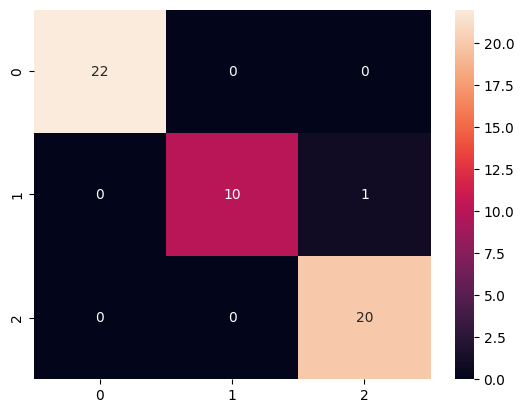

In [ ]:
sns.heatmap(confusionmatrix, annot = True)

In [ ]:
import pickle

In [ ]:
filename = 'trained_IRIS_classification_model.sav'
pickle.dump(knn_model,open(filename,'wb'))